In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [104]:
# Reading in dataframe
file = Path("../data/nyc_311_limit_2020_filtered.csv")
df = pd.read_csv(file)

In [105]:
# Isolating noise column
df_noise = df[df['complaint type'].str.contains("Noise")].loc[:, ['created date', 'complaint type', 'descriptor']]
print(df_noise.head())

df_noise.to_csv("../data/nyc_311_noise.csv", index=False)

              created date           complaint type        descriptor
22  07/11/2020 11:18:32 PM      Noise - Residential  Loud Music/Party
29  07/14/2020 04:00:25 AM  Noise - Street/Sidewalk  Loud Music/Party
30  07/11/2020 11:47:57 PM  Noise - Street/Sidewalk  Loud Music/Party
31  07/11/2020 07:32:04 PM          Noise - Vehicle   Car/Truck Music
32  07/11/2020 08:32:05 PM             Noise - Park  Loud Music/Party


In [106]:
# Assign month by created date
df_noise['created date'] = pd.to_datetime(df_noise['created date'], format='%m/%d/%Y %I:%M:%S %p')
df_noise['month'] = df_noise['created date'].dt.month

months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
          6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
          11: 'November', 12: 'December'}

df_noise['month'] = df_noise['month'].map(months)
print(df_noise.head())

          created date           complaint type        descriptor month
22 2020-07-11 23:18:32      Noise - Residential  Loud Music/Party  July
29 2020-07-14 04:00:25  Noise - Street/Sidewalk  Loud Music/Party  July
30 2020-07-11 23:47:57  Noise - Street/Sidewalk  Loud Music/Party  July
31 2020-07-11 19:32:04          Noise - Vehicle   Car/Truck Music  July
32 2020-07-11 20:32:05             Noise - Park  Loud Music/Party  July


In [269]:
df_cause = df_noise.groupby(['month', 'descriptor']).size().reset_index(name='count')
df_cause.sort_values(by=['month', 'count'], ascending=False, inplace=True)
noise = pd.DataFrame(columns=['month', 'descriptor', 'count'])

for month in months.values():
    if month not in df_cause['month'].unique():
        row = pd.DataFrame({'month': month, 'descriptor': 'None', 'count': 0}, index=[0])
        noise = pd.concat([noise, row], ignore_index=True)
        continue
    row = df_cause[df_cause['month'] == month].iloc[1:4, :]
    noise = pd.concat([noise, row], ignore_index=True)

In [271]:
print(noise)

        month                                    descriptor count
0     January                              Banging/Pounding  4477
1     January                                  Loud Talking  1593
2     January  Noise: Construction Before/After Hours (NM1)   972
3    February                              Banging/Pounding  4422
4    February                                  Loud Talking  1497
5    February  Noise: Construction Before/After Hours (NM1)  1145
6       March                              Banging/Pounding  4626
7       March                                  Loud Talking  1896
8       March                               Car/Truck Music  1217
9       April                              Banging/Pounding  5329
10      April                                  Loud Talking  2299
11      April                               Car/Truck Music  1103
12        May                              Banging/Pounding  5516
13        May                                  Loud Talking  3769
14        

/home/jennifertramsu/programs/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jennifertramsu/programs/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jennifertramsu/programs/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jennifertramsu/programs/miniconda3/envs/datascience/lib/python3.11/site-packages/seaborn/_oldc

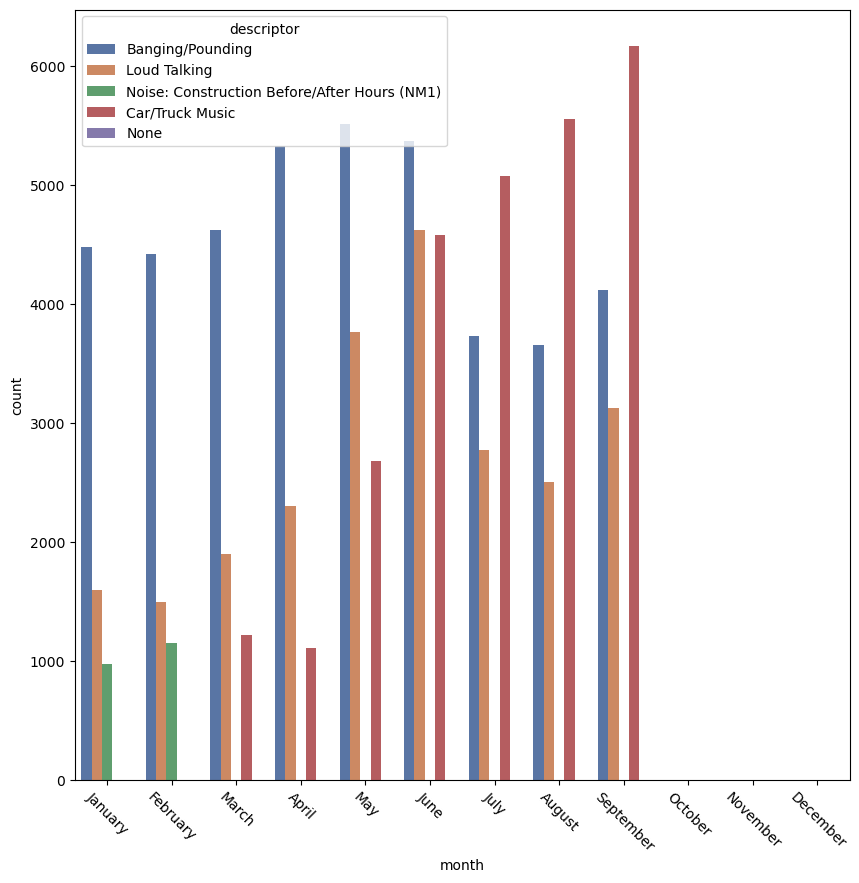

In [274]:
plt.figure(figsize=(10, 10))
plots = sns.barplot(x='month', y='count', data=noise, hue='descriptor', palette='deep')
plots.xaxis.set_tick_params(rotation=-45)

plt.savefig("../images/task1_plot.png")
